In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
%matplotlib inline

### EAD

In [2]:
# Read cvs data in the "data" folder
df = pd.read_csv("data/dataR2.csv")

In [3]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
df.shape

(116, 10)

In [5]:
print(df.dtypes)

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object


In [6]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [8]:
df.quantile()

Age                56.000000
BMI                27.662416
Glucose            92.000000
Insulin             5.924500
HOMA                1.380939
Leptin             20.271000
Adiponectin         8.352692
Resistin           10.827740
MCP.1             471.322500
Classification      2.000000
Name: 0.5, dtype: float64

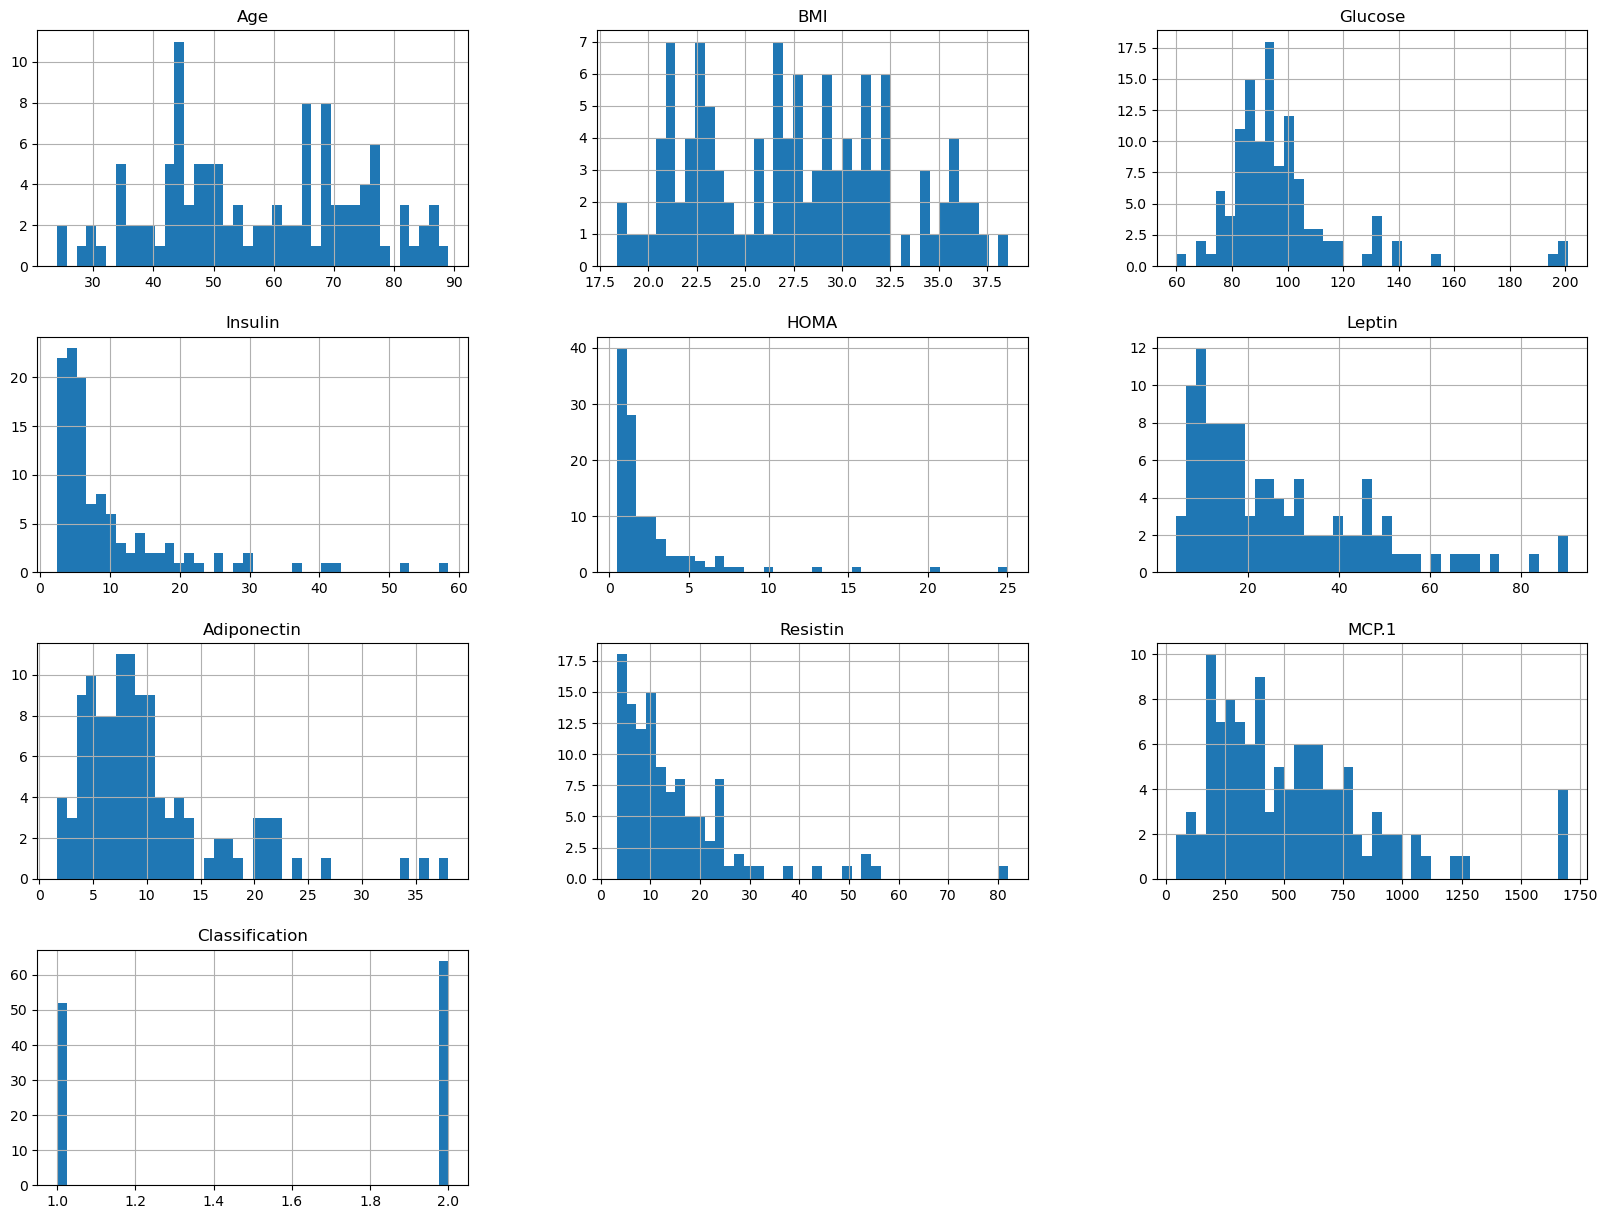

In [9]:
df.hist(bins=40, figsize=(20, 15))
plt.show()

In [10]:
#Get the correlation of the columns
df.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


### Data Preparation

In [11]:
# Select the data into independent 'X' and dependent 'y' variables
X=df.drop("Classification", axis=1)
y=df["Classification"].values

#Split the dataset into 70% Training set and 30% Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Record performace: training time and test time, evaluation metrics
classifiers = ['tree', 'nn', 'boost', 'svm', 'knn']
attr = ['train_time', 'test_time', 'accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score']
performance = pd.DataFrame(columns=attr, index=classifiers)

### Decision tree

In [13]:
# decision tree model
dt_model = tree.DecisionTreeClassifier(random_state=0)
# dt_model.fit(X_train, y_train)
# y_pred = dt_model.predict(X_test)

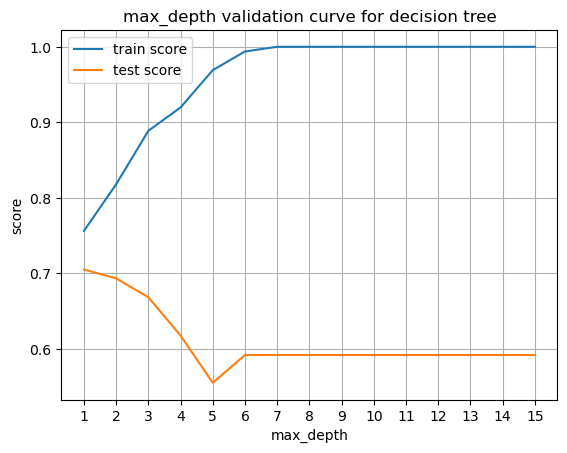

In [14]:
# max_depth validation curve
depth_range = np.arange(15) + 1
train_scores, test_scores = validation_curve(dt_model, X_train, y_train, param_name="max_depth", param_range=depth_range, cv=5)

plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='train score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='test score')
plt.title('max_depth validation curve for decision tree')
plt.xlabel('max_depth')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/dt_max_depth_curve_bc.png')
plt.show()

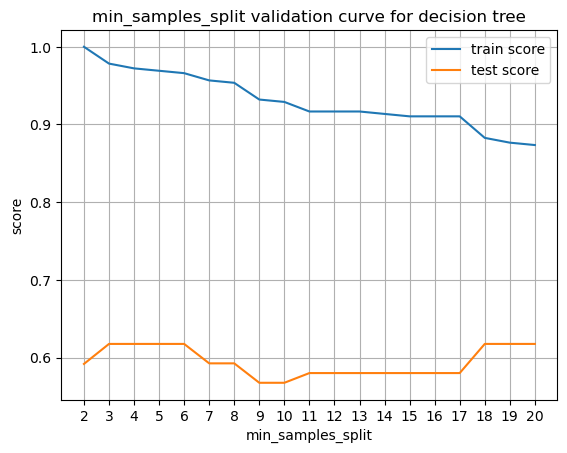

In [15]:
# min_samples_split validation curve
samples_split_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(dt_model, X_train, y_train, param_name="min_samples_split", 
                                             param_range=samples_split_range, cv=5)

plt.figure()
plt.xticks(samples_split_range)
plt.plot(samples_split_range, np.mean(train_scores, axis=1), label='train score')
plt.plot(samples_split_range, np.mean(test_scores, axis=1), label='test score')
plt.title('min_samples_split validation curve for decision tree')
plt.xlabel('min_samples_split')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/dt_min_samples_split_curve_bc.png')
plt.show()

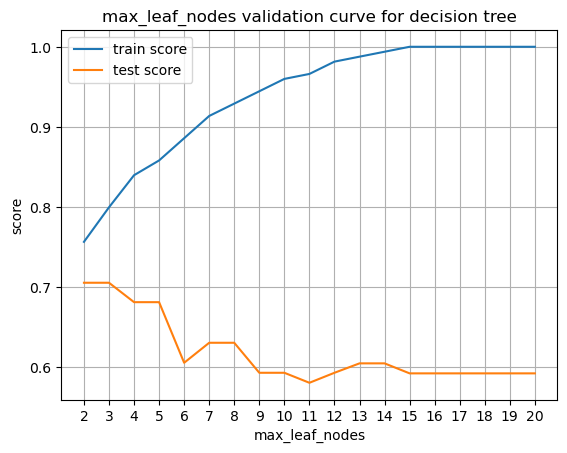

In [16]:
# max_leaf_nodes validation curve
leaf_nodes_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(dt_model, X_train, y_train, param_name="max_leaf_nodes", 
                                             param_range=leaf_nodes_range, cv=5)

plt.figure()
plt.xticks(leaf_nodes_range)
plt.plot(leaf_nodes_range, np.mean(train_scores, axis=1), label='train score')
plt.plot(leaf_nodes_range, np.mean(test_scores, axis=1), label='test score')
plt.title('max_leaf_nodes validation curve for decision tree')
plt.xlabel('max_leaf_nodes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/dt_max_leaf_nodes_curve_bc.png')
plt.show()

In [17]:
# Hyperparameter tuning using grid search
parameters = {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,10).tolist()[0::1],
              'min_samples_split':np.arange(2,15).tolist()[0::1],
              'max_leaf_nodes':np.arange(3,15).tolist()[0::1]}
dt_model_gs = GridSearchCV(dt_model, param_grid=parameters, cv=5, n_jobs=-1)

t0 = time.time()
dt_model_gs.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0

best_dt_params = dt_model_gs.best_params_
best_dt_model = dt_model_gs.best_estimator_

t0 = time.time()
y_pred = best_dt_model.predict(X_test)
t1 = time.time()
test_time = t1 - t0
performance.loc['tree'] = [train_time, test_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
print("Best parameters set for decision tree:")
print(best_dt_params)
print('training time: %f seconds' % train_time)
print('testing time : %f seconds' % test_time)
print('decision tree accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Best parameters set for decision tree:
{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2}
training time: 6.541997 seconds
testing time : 0.000000 seconds
decision tree accuracy: 62.86%


### Neural network

In [18]:
# Neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1, max_iter=3000)
# nn_model.fit(X_train, y_train)
# y_pred = nn_model.predict(X_test)

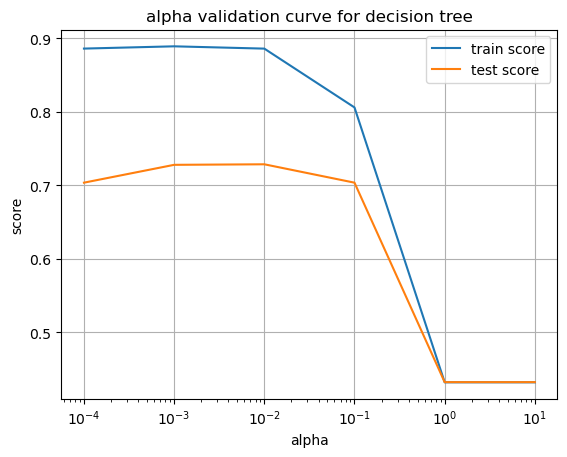

In [19]:
# alpha validation curve
alpha_range = np.logspace(-4, 1, 6)
train_scores, test_scores = validation_curve(nn_model, X_train, y_train, param_name="alpha", 
                                             param_range=alpha_range, cv=5)

plt.figure()
plt.xticks(alpha_range)
plt.semilogx(alpha_range, np.mean(train_scores, axis=1), label='train score')
plt.semilogx(alpha_range, np.mean(test_scores, axis=1), label='test score')
plt.title('alpha validation curve for decision tree')
plt.xlabel('alpha')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/nn_alpha_curve_bc.png')
plt.show()

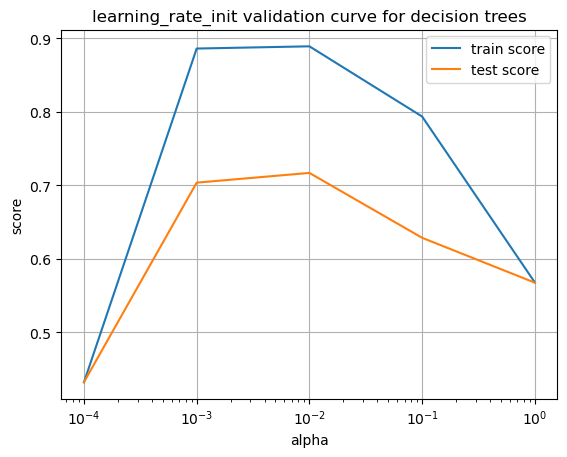

In [20]:
# learning_rate_init validation curve
learning_rate_range = np.logspace(-4, 0, 5)
# learning_rate_range = np.linspace(0.001, 0.1, 5)
train_scores, test_scores = validation_curve(nn_model, X_train, y_train, param_name="learning_rate_init", 
                                             param_range=learning_rate_range, cv=5)

plt.figure()
plt.xticks(learning_rate_range)
plt.semilogx(learning_rate_range, np.mean(train_scores, axis=1), label='train score')
plt.semilogx(learning_rate_range, np.mean(test_scores, axis=1), label='test score')
plt.title('learning_rate_init validation curve for decision trees')
plt.xlabel('alpha')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/nn_learning_rate_init_curve_bc.png')
plt.show()

In [21]:
np.logspace(-3, -1, 8)
np.linspace(0.001, 0.1, 5)

array([0.001  , 0.02575, 0.0505 , 0.07525, 0.1    ])

In [22]:
# Hyperparameter tuning using grid search
parameters = {'alpha':np.linspace(0.001, 0.1, 10),
              'learning_rate_init':np.linspace(0.001, .5, 10)}
nn_model_gs = GridSearchCV(nn_model, param_grid=parameters, cv=5, n_jobs=-1)
t0 = time.time()
nn_model_gs.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0

best_nn_params = nn_model_gs.best_params_
best_nn_model = nn_model_gs.best_estimator_

t0 = time.time()
y_pred = best_nn_model.predict(X_test)
t1 = time.time()
test_time = t1 - t0
performance.loc['nn'] = [train_time, test_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
print("Best parameters set for neural networks:")
print(best_nn_params)
print('training time: %f seconds' % train_time)
print('testing time : %f seconds' % test_time)
print('neural network accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Best parameters set for neural networks:
{'alpha': 0.067, 'learning_rate_init': 0.001}
training time: 10.872998 seconds
testing time : 0.000000 seconds
neural network accuracy: 71.43%


### Boosting

In [23]:
num_learners = 100
dt_stump = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
boost_model = AdaBoostClassifier(estimator=dt_stump, n_estimators=num_learners, random_state=0)
# boost_model.fit(X_train, y_train)
# y_pred = boost_model.predict(X_test)

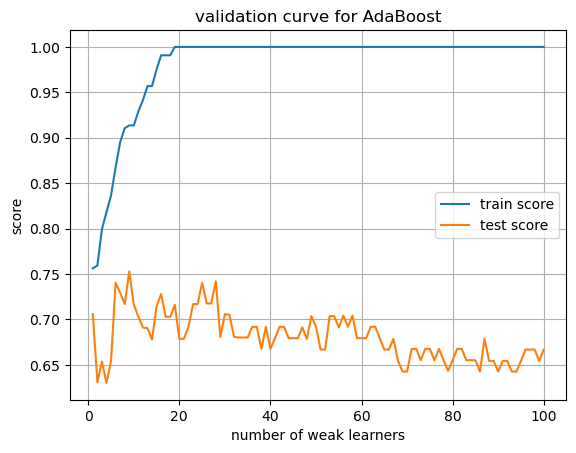

In [24]:
# num_learners curve
# Cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds)
train_scores = np.zeros((num_learners, num_folds))
val_scores = np.zeros((num_learners, num_folds))
for idx, (train_index, test_index) in enumerate(kf.split(X_train)):
    boost_model.fit(X_train[train_index], y_train[train_index])
    train_scores[:, idx] = np.asarray(list(boost_model.staged_score(X_train[train_index], y_train[train_index])))
    val_scores[:, idx] = np.asarray(list(boost_model.staged_score(X_train[test_index], y_train[test_index])))

n_estimators_range = np.arange(num_learners) + 1
plt.figure()
plt.plot(n_estimators_range, np.mean(train_scores, axis=1), label='train score')
plt.plot(n_estimators_range, np.mean(val_scores, axis=1), label='test score')
plt.title('validation curve for AdaBoost')
plt.xlabel('number of weak learners')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/boost_num_weak_learner_curve_bc.png')
plt.show()

In [25]:
# Model valuation
optimal_num_learners = np.argmax(np.mean(val_scores, axis=1))
best_boost_model = AdaBoostClassifier(estimator=dt_stump, n_estimators=optimal_num_learners, random_state=0)

t0 = time.time()
best_boost_model.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0

t0 = time.time()
y_pred = best_boost_model.predict(X_test)
t1 = time.time()
test_time = t1 - t0
performance.loc['boost'] = [train_time, test_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
print("Optimal number of weak learners for AdaBoost:")
print(optimal_num_learners)
print('training time: %f seconds' % train_time)
print('testing time : %f seconds' % test_time)
print('AdaBoost accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Optimal number of weak learners for AdaBoost:
8
training time: 0.012031 seconds
testing time : 0.001005 seconds
AdaBoost accuracy: 68.57%


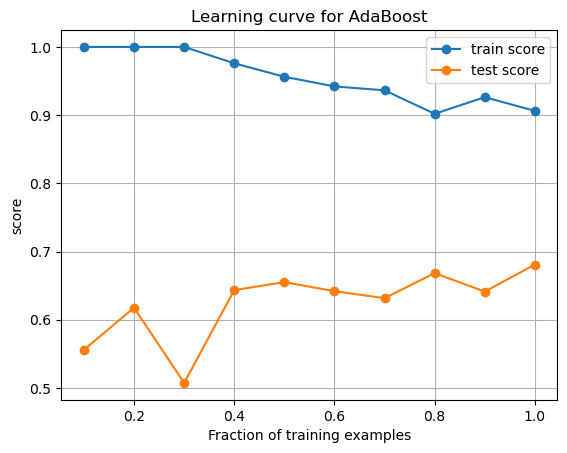

In [26]:
# learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
_, train_scores, test_scores = learning_curve(best_boost_model, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='test score')
plt.title('Learning curve for AdaBoost')
plt.xlabel('Fraction of training examples')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/boost_learning_curve_bc.png')
plt.show()

### SVM

In [27]:
svm_model = svm.SVC()

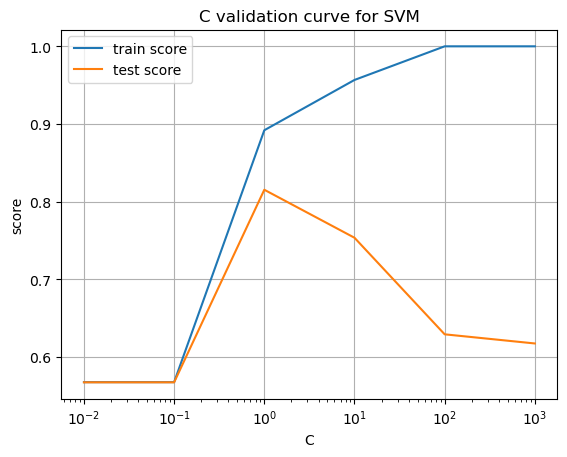

In [28]:
C_range = np.logspace(-2, 3, 6)
train_scores, test_scores = validation_curve(svm_model, X_train, y_train, param_name="C", param_range=C_range, cv=5)

plt.figure()
plt.semilogx(C_range, np.mean(train_scores, axis=1), label='train score')
plt.semilogx(C_range, np.mean(test_scores, axis=1), label='test score')
plt.title('C validation curve for SVM')
plt.xlabel('C')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/svm_c_curve_bc.png')
plt.show()

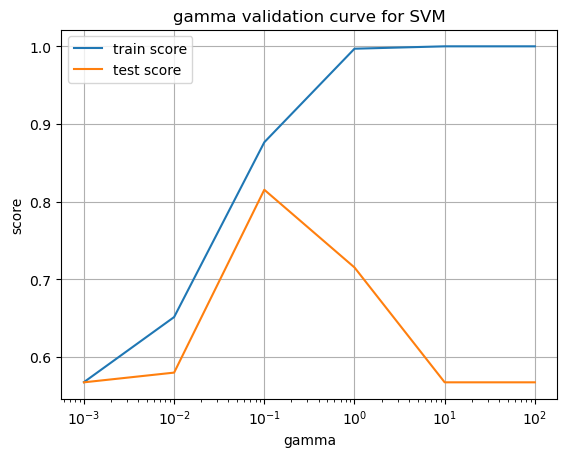

In [29]:
gamma_range = np.logspace(-3, 2, 6)
train_scores, test_scores = validation_curve(svm_model, X_train, y_train, param_name="gamma", param_range=gamma_range, cv=5)

plt.figure()
plt.semilogx(gamma_range, np.mean(train_scores, axis=1), label='train score')
plt.semilogx(gamma_range, np.mean(test_scores, axis=1), label='test score')
plt.title('gamma validation curve for SVM')
plt.xlabel('gamma')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/svm_gamma_curve_bc.png')
plt.show()

In [30]:
# Hyperparameter tuning using grid search
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 
svm_model_gs = GridSearchCV(svm_model, param_grid=parameters, cv=5, n_jobs=-1)
t0 = time.time()
svm_model_gs.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0

best_svm_params = svm_model_gs.best_params_
best_svm_model = svm_model_gs.best_estimator_

t0 = time.time()
y_pred = best_svm_model.predict(X_test)
t1 = time.time()
test_time = t1 - t0
performance.loc['svm'] = [train_time, test_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
print("Best parameters set for SVM:")
print(best_svm_params)
print('training time: %f seconds' % train_time)
print('testing time : %f seconds' % test_time)
print('SVM accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Best parameters set for SVM:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
training time: 0.700999 seconds
testing time : 0.000000 seconds
SVM accuracy: 68.57%


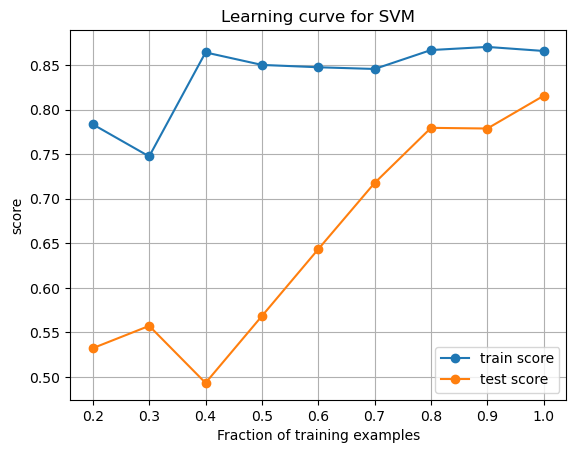

In [31]:
# learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
_, train_scores, test_scores = learning_curve(best_svm_model, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='test score')
plt.title('Learning curve for SVM')
plt.xlabel('Fraction of training examples')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/svm_learning_curve_bc.png')
plt.show()

### kNN

In [32]:
knn_model = KNeighborsClassifier()

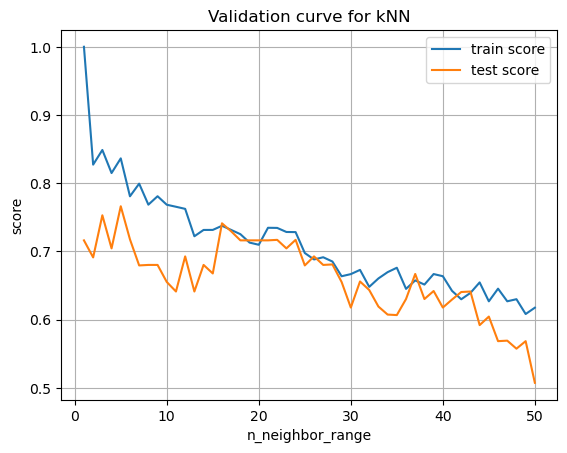

In [33]:
n_neighbor_range = np.arange(1, 51)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors", 
                                             param_range=n_neighbor_range, cv=5)

plt.figure()
plt.plot(n_neighbor_range, np.mean(train_scores, axis=1), label='train score')
plt.plot(n_neighbor_range, np.mean(test_scores, axis=1), label='test score')
plt.title('Validation curve for kNN')
plt.xlabel('n_neighbor_range')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/knn_n_neighbor_range_curve_bc.png')
plt.show()

In [34]:
# Model valuation
optimal_n_neighbor = np.argmax(np.mean(val_scores, axis=1))
best_knn_model = KNeighborsClassifier(n_neighbors=optimal_n_neighbor)

t0 = time.time()
best_knn_model.fit(X_train, y_train)
t1 = time.time()
train_time = t1 - t0

t0 = time.time()
y_pred = best_knn_model.predict(X_test)
t1 = time.time()
test_time = t1 - t0
performance.loc['knn'] = [train_time, test_time, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                            recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
print("Optimal number of neighbors for knn:")
print(optimal_n_neighbor)
print('training time: %f seconds' % train_time)
print('testing time : %f seconds' % test_time)
print('kNN accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

Optimal number of neighbors for knn:
8
training time: 0.002000 seconds
testing time : 0.003000 seconds
kNN accuracy: 77.14%


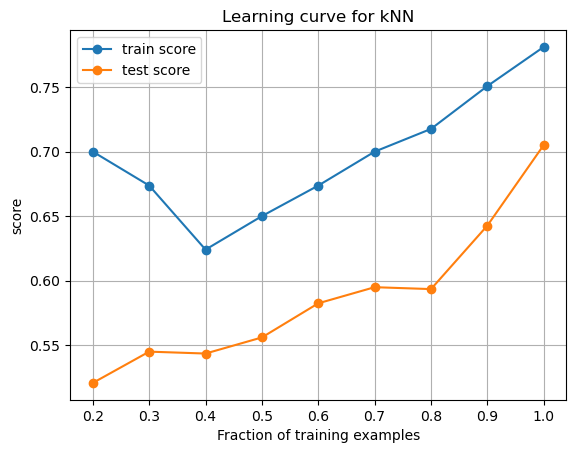

In [35]:
# learning curve
import warnings
warnings.filterwarnings('ignore')
train_sizes = np.linspace(0.1, 1.0, 10)
_, train_scores, test_scores = learning_curve(best_knn_model, X_train, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='test score')
plt.title('Learning curve for kNN')
plt.xlabel('Fraction of training examples')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.savefig('figures/knn_learning_curve_bc.png')
plt.show()

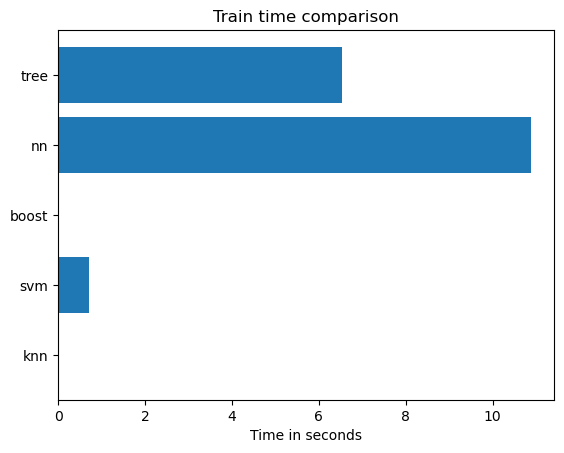

In [36]:
# Classifier comparison: Train time
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, performance['train_time'])
plt.gca().set_yticks(y_pos)
plt.gca().set_yticklabels(classifiers)
plt.gca().invert_yaxis()
plt.title('Train time comparison')
plt.xlabel('Time in seconds')
plt.savefig('figures/train_time_comparison_bc.png')
plt.show()

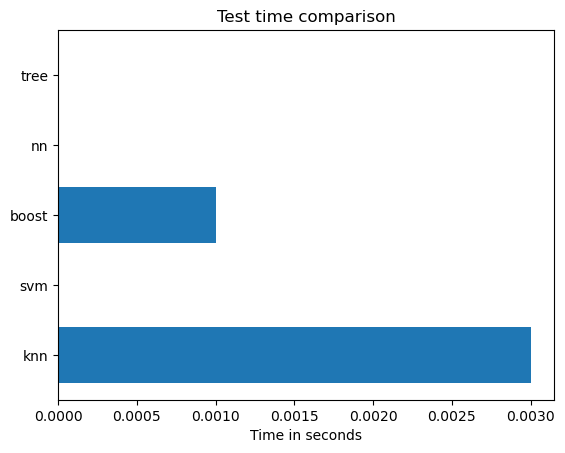

In [37]:
# Classifier comparison: Test time
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, performance['test_time'])
plt.gca().set_yticks(y_pos)
plt.gca().set_yticklabels(classifiers)
plt.gca().invert_yaxis()
plt.title('Test time comparison')
plt.xlabel('Time in seconds')
plt.savefig('figures/test_time_comparison_bc.png')
plt.show()

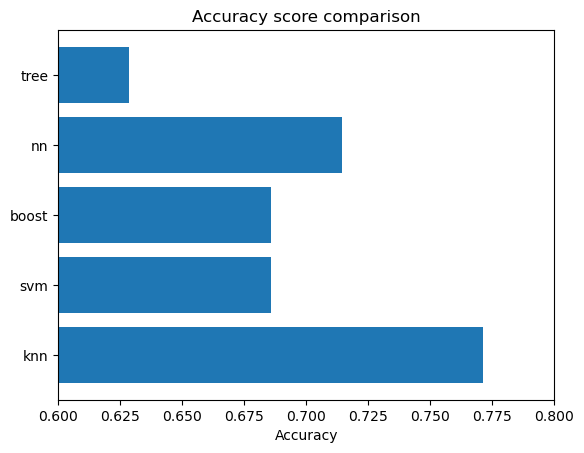

In [38]:
# Classifier comparison
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, performance['accuracy_score'])
plt.gca().set_yticks(y_pos)
plt.gca().set_xlim(0.6, .8)
plt.gca().set_yticklabels(classifiers)
plt.gca().invert_yaxis()
plt.title('Accuracy score comparison')
plt.xlabel('Accuracy')
plt.savefig('figures/accuracy_score_comparison_bc.png')
plt.show()